In [1]:
import pandas as pd 
import numpy as np
import yfinance
from IPython.display import HTML
import random
#from ipynb.fs.full.Functions1 import hide_toggle
#from operator import itemgetter 
import matplotlib.dates as mpl_dates
import matplotlib.pyplot as plt
%matplotlib inline
#from mpl_finance import candlestick_ohlc
from mplfinance.original_flavor import candlestick_ohlc
import pandas_datareader as pdr
import datetime as dt
import talib
from itertools import compress
#from ipynb.fs.full.Hide import hide_toggle

In [2]:
symbol ="AAPL"
num_name= symbol.split(' ') 
df = []
for i in num_name:
        ticker = yfinance.Ticker(i)
        data=ticker.history(interval='1d',start="2019-01-01",end="2021-01-01")
        data['Date'] = pd.to_datetime(data.index) # just to crate another column for date!!!
        data['Date'] = data['Date'].apply(mpl_dates.date2num)
        data = data.loc[:,['Date', 'Open', 'High', 'Low', 'Close']]
        ohlc_data= data.loc[:,['Date', 'Open', 'High', 'Low', 'Close']].values
        df.append(data)

df[0]

,Date,Open,High,Low,Close
Date,,,,,
2018-12-31,17896.0,38.653761,38.856137,38.153916,38.461140
2019-01-02,17898.0,37.766231,38.731784,37.605305,38.505024
2019-01-03,17899.0,35.106087,35.530346,34.623312,34.669640
2019-01-04,17900.0,35.240192,36.220374,35.062200,36.149662
2019-01-07,17903.0,36.256950,36.288648,35.574236,36.069202
...,...,...,...,...,...
2020-12-24,18620.0,131.124063,133.260869,130.904390,131.773087
2020-12-28,18624.0,133.790085,137.135078,133.310790,136.486053
2020-12-29,18625.0,137.844025,138.582912,134.139554,134.668762


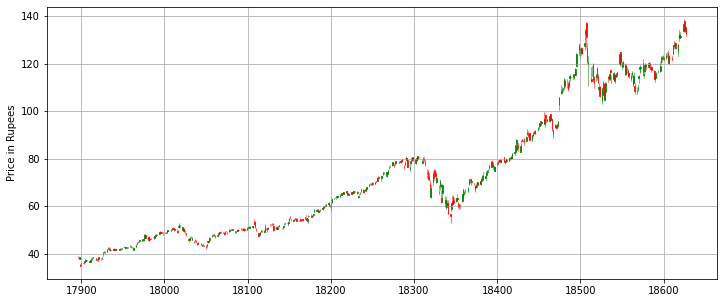

In [3]:
fig, ax = plt.subplots()
fig.set_size_inches((12, 5))
candlestick_ohlc(ax,data.values,width=0.6, \
                   colorup='green', colordown='red', alpha=0.8)

plt.grid()
plt.ylabel("Price in Rupees")
plt.show()

In [4]:
# create 20 days simple moving average column
data['20_SMA'] = data['Close'].rolling(window = 20, min_periods = 1).mean()
# create 50 days simple moving average column
data['50_SMA'] = data['Close'].rolling(window = 50, min_periods = 1).mean()
# display first few rows
data.head()


,Date,Open,High,Low,Close,20_SMA,50_SMA
Date,,,,,,,
2018-12-31,17896.0,38.653761,38.856137,38.153916,38.461140,38.461140,38.461140
2019-01-02,17898.0,37.766231,38.731784,37.605305,38.505024,38.483082,38.483082
2019-01-03,17899.0,35.106087,35.530346,34.623312,34.669640,37.211934,37.211934
2019-01-04,17900.0,35.240192,36.220374,35.062200,36.149662,36.946366,36.946366
2019-01-07,17903.0,36.256950,36.288648,35.574236,36.069202,36.770934,36.770934


In [5]:
data['Signal'] = 0.0
data['Signal'] = np.where(data['20_SMA'] > data['50_SMA'], 1.0, 0.0)
data

,Date,Open,High,Low,Close,20_SMA,50_SMA,Signal
Date,,,,,,,,
2018-12-31,17896.0,38.653761,38.856137,38.153916,38.461140,38.461140,38.461140,0.0
2019-01-02,17898.0,37.766231,38.731784,37.605305,38.505024,38.483082,38.483082,0.0
2019-01-03,17899.0,35.106087,35.530346,34.623312,34.669640,37.211934,37.211934,0.0
2019-01-04,17900.0,35.240192,36.220374,35.062200,36.149662,36.946366,36.946366,0.0
2019-01-07,17903.0,36.256950,36.288648,35.574236,36.069202,36.770934,36.770934,0.0
...,...,...,...,...,...,...,...,...
2020-12-24,18620.0,131.124063,133.260869,130.904390,131.773087,124.716634,119.495019,1.0
2020-12-28,18624.0,133.790085,137.135078,133.310790,136.486053,125.720135,119.818294,1.0
2020-12-29,18625.0,137.844025,138.582912,134.139554,134.668762,126.509954,120.138915,1.0


In [6]:
data['Position'] = data['Signal'].diff()
# display first few rows
data.head()

,Date,Open,High,Low,Close,20_SMA,50_SMA,Signal,Position
Date,,,,,,,,,
2018-12-31,17896.0,38.653761,38.856137,38.153916,38.461140,38.461140,38.461140,0.0,NaN
2019-01-02,17898.0,37.766231,38.731784,37.605305,38.505024,38.483082,38.483082,0.0,0.0
2019-01-03,17899.0,35.106087,35.530346,34.623312,34.669640,37.211934,37.211934,0.0,0.0
2019-01-04,17900.0,35.240192,36.220374,35.062200,36.149662,36.946366,36.946366,0.0,0.0
2019-01-07,17903.0,36.256950,36.288648,35.574236,36.069202,36.770934,36.770934,0.0,0.0


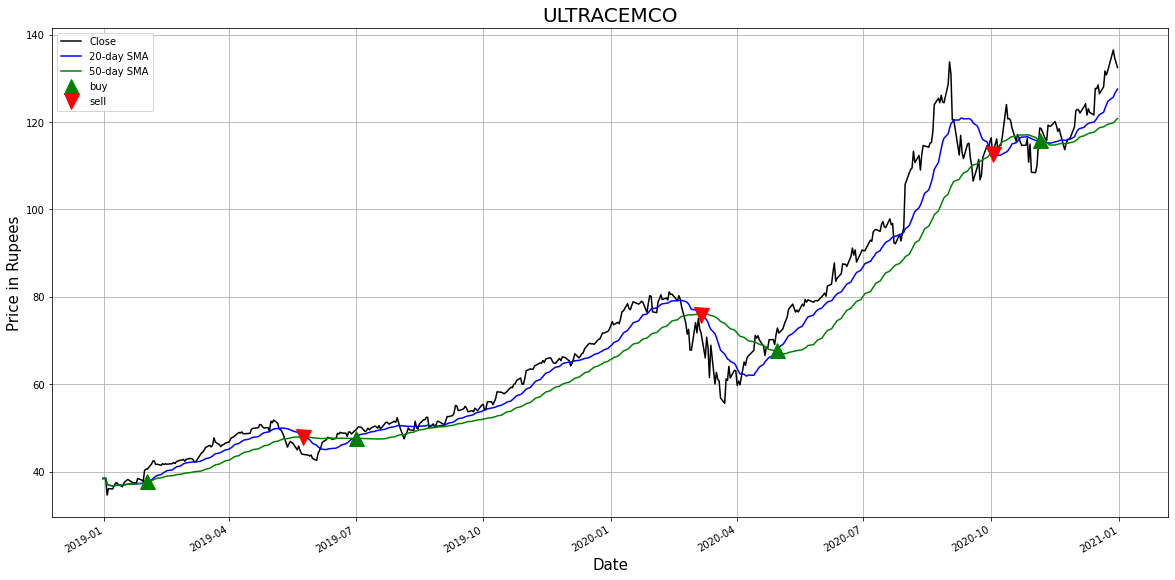

In [7]:
plt.figure(figsize = (20,10))
# plot close price, short-term and long-term moving averages 
data['Close'].plot(color = 'k', label= 'Close') 
data['20_SMA'].plot(color = 'b',label = '20-day SMA') 
data['50_SMA'].plot(color = 'g', label = '50-day SMA')
# plot ‘buy’ signals
plt.plot(data[data['Position'] == 1].index, 
         data['20_SMA'][data['Position'] == 1], 
         '^', markersize = 15, color = 'g', label = 'buy')
# plot ‘sell’ signals
plt.plot(data[data['Position'] == -1].index, 
         data['20_SMA'][data['Position'] == -1], 
         'v', markersize = 15, color = 'r', label = 'sell')
plt.ylabel('Price in Rupees', fontsize = 15 )
plt.xlabel('Date', fontsize = 15 )
plt.title('ULTRACEMCO', fontsize = 20)
plt.legend()
plt.grid()
plt.show()

In [16]:
df[0]["20_SMA"][data['Position'] == -1]

Date
2019-05-24     47.899692
2020-03-06     75.822133
2020-10-02    112.685910
Name: 20_SMA, dtype: float64

In [17]:
df[0]["50_SMA"][data['Position'] == -1]

Date
2019-05-24     47.972482
2020-03-06     76.231055
2020-10-02    113.375995
Name: 50_SMA, dtype: float64

In [15]:
df[0]["20_SMA"][data['Position'] == 1]

Date
2019-02-01     37.840600
2019-07-01     47.781864
2020-04-30     67.963178
2020-11-05    115.864668
Name: 20_SMA, dtype: float64

In [18]:
df[0]["50_SMA"][data['Position'] == 1]

Date
2019-02-01     37.758600
2019-07-01     47.648413
2020-04-30     67.243855
2020-11-05    115.842090
Name: 50_SMA, dtype: float64

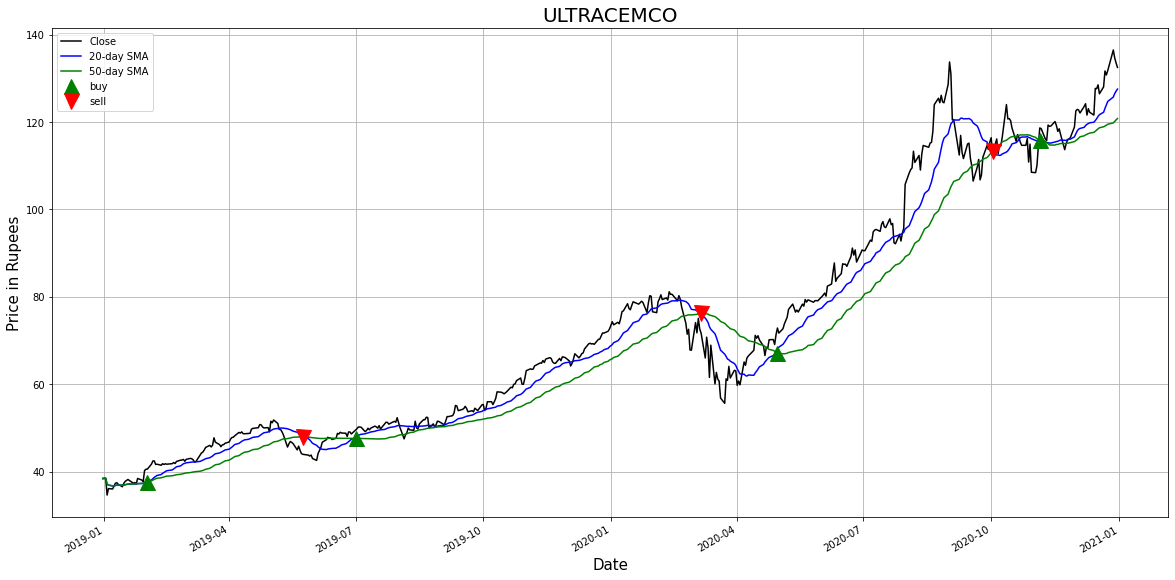

In [19]:
plt.figure(figsize = (20,10))
# plot close price, short-term and long-term moving averages 
data['Close'].plot(color = 'k', label= 'Close') 
data['20_SMA'].plot(color = 'b',label = '20-day SMA') 
data['50_SMA'].plot(color = 'g', label = '50-day SMA')
# plot ‘buy’ signals
plt.plot(data[data['Position'] == 1].index, 
         data['50_SMA'][data['Position'] == 1], 
         '^', markersize = 15, color = 'g', label = 'buy')
# plot ‘sell’ signals
plt.plot(data[data['Position'] == -1].index, 
         data['50_SMA'][data['Position'] == -1], 
         'v', markersize = 15, color = 'r', label = 'sell')
plt.ylabel('Price in Rupees', fontsize = 15 )
plt.xlabel('Date', fontsize = 15 )
plt.title('ULTRACEMCO', fontsize = 20)
plt.legend()
plt.grid()
plt.show()